In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df_accum = pd.read_csv('data/input_df_SUMMmet_accum.csv')
df_ablat = pd.read_csv('data/input_df_SUMMmet_ablat.csv')

sites_to_drop = ['PTSH', 'SPST', 'SR01', 'SR25', 'SR11']
df_accum = df_accum[~df_accum['site.x'].isin(sites_to_drop)]
df_ablat = df_ablat[~df_ablat['site.x'].isin(sites_to_drop)]

df_ablat = df_ablat[df_ablat['delta'] > -30]
df_ablat = df_ablat[df_ablat['delta'] < 50]

df_accum = df_accum[df_accum['delta'] < 40]

df_accum = df_accum.drop(['ant1d_SNOD', 'SNOD', 'date', 'X', 'Unnamed: 0', 'site.x', 'day', 'site.y'], axis = 1)
df_ablat = df_ablat.drop(['ant1d_SNOD', 'SNOD', 'date', 'X', 'Unnamed: 0', 'site.x', 'day', 'site.y'], axis = 1)


In [123]:
X_accum = df_accum.drop('delta', axis = 1)
y_accum = df_accum['delta']

X_ablat = df_ablat.drop('delta', axis = 1)
y_ablat = df_ablat['delta']

X_accum_train, X_accum_test, y_accum_train, y_accum_test_1 = train_test_split(X_accum,
                                                                              y_accum,
                                                                              test_size=0.2, 
                                                                              random_state=4)

X_column_names = X_ablat.columns
y_column_names = y_ablat.name

scaler_X_accum = StandardScaler()
X_accum_fit = pd.DataFrame(scaler_X_accum.fit_transform(X_accum))
X_accum_fit.columns = X_column_names

y_accum_values = pd.DataFrame(y_accum).values

scaler_y_accum = StandardScaler()
y_accum_fit = pd.Series(scaler_y_accum.fit_transform(y_accum_values)[:,0])
y_accum_fit.name = y_column_names

scaler_X_ablat = StandardScaler()
X_ablat_fit = pd.DataFrame(scaler_X_ablat.fit_transform(X_ablat))
X_ablat_fit.columns = X_column_names

y_ablat_values = pd.DataFrame(y_ablat).values

scaler_y_ablat = StandardScaler()
y_ablat_fit = pd.Series(scaler_y_ablat.fit_transform(y_ablat_values)[:,0])
y_ablat_fit.name = y_column_names

In [124]:
X_accum_fit_train, X_accum_fit_test, y_accum_fit_train, y_accum_fit_test = train_test_split(X_accum_fit,
                                                                                            y_accum_fit,
                                                                                            test_size=0.2, 
                                                                                            random_state=4)
X_ablat_fit_train, X_ablat_fit_test, y_ablat_fit_train, y_ablat_fit_test = train_test_split(X_ablat_fit, 
                                                                                            y_ablat_fit, 
                                                                                            test_size=0.2, 
                                                                                            random_state=4)

In [125]:
accum_backprop = MLPRegressor(hidden_layer_sizes = [200,200],
                              activation = 'tanh',
                              learning_rate_init = 0.01,
                              max_iter = 2000,
                              shuffle = True,
                              random_state = 10,
                              tol = 0.0,
                              n_iter_no_change=200,
                              verbose = True,
                              learning_rate='adaptive',
                              solver = 'adam')

accum_backprop.fit(X_accum_fit_train, y_accum_fit_train)
preds_accum = accum_backprop.predict(X_accum_fit_test)

preds_accum = scaler_y_accum.inverse_transform(preds_accum.reshape(-1,1))
y_accum_test_2 = scaler_y_accum.inverse_transform(np.array(y_accum_fit_test).reshape(-1,1))

rmse_accum = metrics.root_mean_squared_error(y_accum_test_2, preds_accum)
r2_accum = metrics.r2_score(y_accum_test_2, preds_accum)


Iteration 1, loss = 3.40827744
Iteration 2, loss = 1.42688563
Iteration 3, loss = 0.66538147
Iteration 4, loss = 0.64711150
Iteration 5, loss = 0.42999165
Iteration 6, loss = 0.42179670
Iteration 7, loss = 0.39098569
Iteration 8, loss = 0.36081050
Iteration 9, loss = 0.35357103
Iteration 10, loss = 0.34090124
Iteration 11, loss = 0.32589406
Iteration 12, loss = 0.31272324
Iteration 13, loss = 0.30478575
Iteration 14, loss = 0.29657075
Iteration 15, loss = 0.28730924
Iteration 16, loss = 0.27746863
Iteration 17, loss = 0.26359760
Iteration 18, loss = 0.25567979
Iteration 19, loss = 0.24443643
Iteration 20, loss = 0.23727738
Iteration 21, loss = 0.22167877
Iteration 22, loss = 0.21041134
Iteration 23, loss = 0.20310532
Iteration 24, loss = 0.19229583
Iteration 25, loss = 0.18264268
Iteration 26, loss = 0.17499056
Iteration 27, loss = 0.16564343
Iteration 28, loss = 0.15569883
Iteration 29, loss = 0.14401199
Iteration 30, loss = 0.14240173
Iteration 31, loss = 0.13987701
Iteration 32, los

rmse =  3.7276532031238307
r2 =  0.7353984605210517


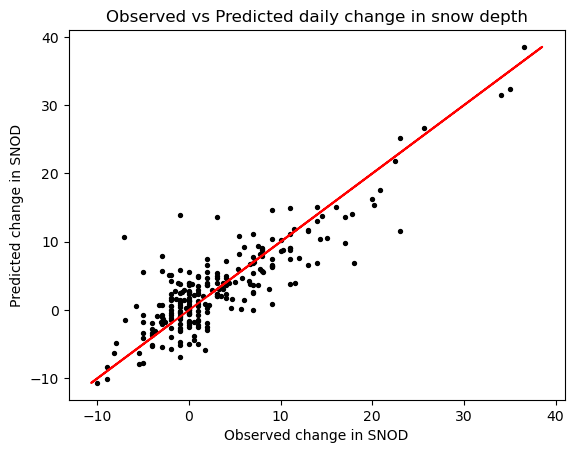

In [126]:
plt.scatter(y_accum_test_2, preds_accum, s = 8, c = "black")
plt.plot(preds_accum, preds_accum, c = "red")
plt.xlabel("Observed change in SNOD")
plt.ylabel("Predicted change in SNOD")
plt.title("Observed vs Predicted daily change in snow depth")
print("rmse = ", rmse_accum) 
print("r2 = ", r2_accum)